In [2]:
# Check and install cobra if needed
try:
    import cobra
except ImportError:
    print("Installing COBRApy...")
    %pip install -q cobra
    import cobra

from cobra.io import read_sbml_model
from cobra.flux_analysis import (
    flux_variability_analysis,
    single_reaction_deletion,
    single_gene_deletion
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
#load the model changed to built-in core model
try:
    model = cobra.datasets.load_model("textbook")
    print(f"Model '{model.id}' loaded successfully with {len(model.reactions)} reactions.")
except Exception as e:
    print(f"Error loading model: {e}")

# Download E. coli core model (standard COBRA benchmark)
url = "http://bigg.ucsd.edu/static/models/e_coli_core.xml"
model_file = "e_coli_core.xml"

urllib.request.urlretrieve(url, model_file)


ModuleNotFoundError: No module named 'cobra.test'

In [9]:
def reset_model():
    model.reactions.EX_glc__D_e.lower_bound = -10
    model.reactions.EX_o2_e.lower_bound = -20


In [18]:
reset_model()

solution = model.optimize()
print("Baseline growth rate:", solution.objective_value)


Baseline growth rate: 0.8326136426821353


In [10]:
solution.fluxes.abs().sort_values(ascending=False).head(20).plot(kind="bar")
plt.ylabel("Flux")
plt.title("Top 20 Reaction Fluxes (FBA)")
plt.show()


NameError: name 'solution' is not defined

In [ ]:
# Normal glucose
reset_model()
model.reactions.EX_glc__D_e.lower_bound = -10
print("Normal glucose growth:", model.optimize().objective_value)

# Extreme glucose
reset_model()
model.reactions.EX_glc__D_e.lower_bound = -100
print("Extreme glucose growth:", model.optimize().objective_value)

# No glucose
reset_model()
model.reactions.EX_glc__D_e.lower_bound = 0
print("No glucose growth:", model.optimize().objective_value)


In [ ]:
reset_model()

# Ensure model is feasible
print("Growth before FVA:", model.optimize().objective_value)

fva = flux_variability_analysis(model, fraction_of_optimum=0.9)

fva["range"] = fva["maximum"] - fva["minimum"]
fva.head()


In [ ]:
fva.sort_values("range", ascending=False).head(20).plot(kind="bar")
plt.ylabel("Flux Range")
plt.title("Flux Variability Analysis")
plt.show()


In [23]:
reset_model()

oxygen_levels = np.linspace(-20, 0, 10)
growth_rates = []

for o2 in oxygen_levels:
    model.reactions.EX_o2_e.lower_bound = o2
    sol = model.optimize()
    growth_rates.append(sol.objective_value)


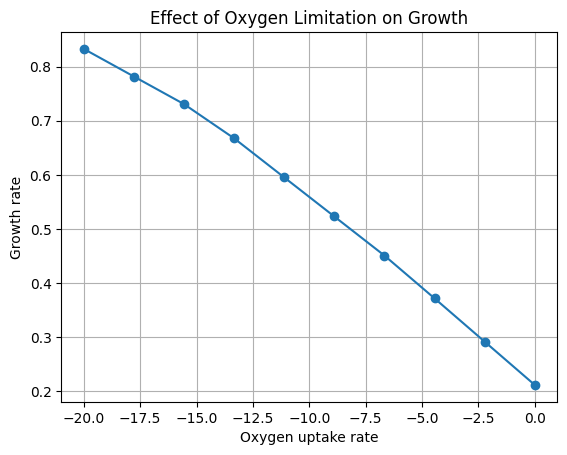

In [24]:
plt.plot(oxygen_levels, growth_rates, marker="o")
plt.xlabel("Oxygen uptake rate")
plt.ylabel("Growth rate")
plt.title("Effect of Oxygen Limitation on Growth")
plt.grid(True)
plt.show()


In [25]:
reset_model()

reaction_deletions = single_reaction_deletion(model)
reaction_deletions.sort_values("growth").head(10)


,ids,growth,status
60,{CS},-1.929950e-14,optimal
57,{ACONTa},-2.469381e-15,optimal
76,{EX_h_e},-2.057182e-15,optimal
93,{NH4t},-8.287889e-16,optimal
66,{EX_nh4_e},-1.242637e-16,optimal
73,{RPI},-2.368332e-17,optimal
6,{BIOMASS_Ecoli_core_w_GAM},0.000000e+00,optimal
41,{GLNS},4.153250e-16,optimal
77,{PGM},4.577623e-16,optimal
80,{ICDHyr},5.120917e-16,optimal


In [26]:
reset_model()
with model:
    model.reactions.PFK.knock_out()
    print("Growth after PFK deletion:", model.optimize().objective_value)

reset_model()
with model:
    model.reactions.GAPD.knock_out()
    print("Growth after GAPD deletion:", model.optimize().objective_value)


Growth after PFK deletion: 0.5115370794046239
Growth after GAPD deletion: -4.53628879761558e-17


In [27]:
reset_model()

gene_deletions = single_gene_deletion(model)
gene_deletions.sort_values("growth").head(10)


,ids,growth,status
42,{b2926},-3.091556e-16,optimal
116,{b0720},9.495877e-16,optimal
18,{b1779},2.368544e-15,optimal
56,{b2779},2.483823e-15,optimal
41,{b1136},4.689500e-15,optimal
57,{s0001},2.111407e-01,optimal
48,{b2282},2.116629e-01,optimal
5,{b2277},2.116629e-01,optimal
1,{b2285},2.116629e-01,optimal
12,{b2287},2.116629e-01,optimal


In [ ]:
reset_model()
with model:
    model.genes.get_by_id("b1779").knock_out()
    print("Growth after gene b1779 deletion:", model.optimize().objective_value)

reset_model()
with model:
    model.genes.get_by_id("b0720").knock_out()
    print("Growth after gene b0720 deletion:", model.optimize().objective_value)


ModuleNotFoundError: No module named 'cobra'

In [7]:
# 1. Set the objective to maximize biomass (growth)
model.objective = 'Biomass_Ecoli_core'

# 2. Run Flux Balance Analysis
solution = model.optimize()

# 3. Filter for Glycolysis reactions specifically
# Common glycolysis reaction IDs in the core model:
glycolysis_ids = ['GLCpts', 'PGI', 'PFK', 'FBA', 'TPI', 'GAPD', 'PGK', 'PGM', 'ENO', 'PYK']

print("\n--- Glycolysis Fluxes ---")
for rxn_id in glycolysis_ids:
    rxn = model.reactions.get_by_id(rxn_id)
    print(f"{rxn.name} ({rxn_id}): {solution.fluxes[rxn_id]:.2f}")

NameError: name 'model' is not defined

In [13]:
from cobra.test import create_test_model

try:
    # 'textbook' is the name of the E. coli core model used for teaching
    model = create_test_model("textbook")
    print(f"Successfully loaded '{model.id}' model!")
    print(f"Reactions: {len(model.reactions)}")
    print(f"Metabolites: {len(model.metabolites)}")
except Exception as e:
    print(f"Error loading model: {e}")
    # Fallback: if you managed to download the file despite the timeout
    try:
        model = read_sbml_model("e_coli_core.xml")
        print("Loaded model from local file.")
    except:
        print("Could not find local file. Please check your internet connection and try again.")

ModuleNotFoundError: No module named 'cobra.test'